In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles

In [2]:
url = 'https://raw.githubusercontent.com/data-visualization-society/data_visualization_survey/master/data/2020/DataVizCensus2020-AnonymizedResponses.csv'
df = pd.read_csv(url, error_bad_lines = False)

In [3]:
df.head()

,How many years of professional experience do you have?,How many years of data visualization experience do you have doing professional data visualization?,Are you a Data Visualization Society member?,How did you learn data visualization?,What is the highest level of education you have completed?,"If you went to college, in what area was your undergraduate major?",In what area was your graduate degree?,What country do you live in?,Do you consider yourself a member of a historically disadvantaged or underrepresented racial or ethnic group?,Which of these best describes your role as a data visualizer in the past year?,...,What methods do you find most helpful in learning new data visualization skills?,What methods do you find most helpful in learning new data visualization skills?_1,What methods do you find most helpful in learning new data visualization skills?_2,What methods do you find most helpful in learning new data visualization skills?_3,What methods do you find most helpful in learning new data visualization skills?_4,What methods do you find most helpful in learning new data visualization skills?_5,What methods do you find most helpful in learning new data visualization skills?_6,What methods do you find most helpful in learning new data visualization skills?_7,Who do you look to as a leader in data visualization?,gender_collapsed
0,5-10,5,No,Mostly Self-Taught,Masters Degree (or similar graduate degree),"Science, Math, and Technology","Science, Math, and Technology",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other:,NaN,NaN
1,NaN,NaN,Yes,Equal Parts School and Self-Taught,Bachelors Degree,Business,NaN,Sweden,No,Freelance/Consultant/ Independent contractor,...,NaN,Workshops,Examples,Video Tutorials,NaN,NaN,NaN,Other:,NaN,Man
2,5-10,4,Yes,Mostly Self-Taught,Bachelors Degree,Social Sciences,NaN,United Kingdom,No,NaN,...,Books,Workshops,NaN,Video Tutorials,NaN,Working through a project,NaN,Other:,Giorgia Lupi,Man
3,26-30,(16-20],Yes,Mostly Self-Taught,NaN,NaN,NaN,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other:,NaN,NaN
4,5 or less,less than 1,I don't know,Mostly from School (or other formal courses),Masters Degree (or similar graduate degree),"Science, Math, and Technology","Science, Math, and Technology",United States,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other:,NaN,Man


In [4]:
nm = 'Which of these best describes your role as a data visualizer in the past year?'
d1 = df[~df[nm].isnull()].index.tolist() # independent
d2 = df[~df[nm+'_1'].isnull()].index.tolist() # organization
d3 = df[~df[nm+'_2'].isnull()].index.tolist() # hobby
d4 = df[~df[nm+'_3'].isnull()].index.tolist() # student
d5 = df[~df[nm+'_4'].isnull()].index.tolist() # teacher
d6 = df[~df[nm+'_5'].isnull()].index.tolist() # passive income

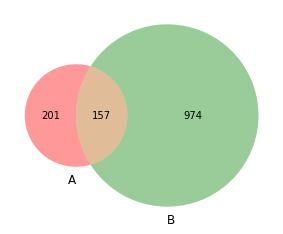

In [5]:
venn2([set(d1), set(d2)])
plt.show()

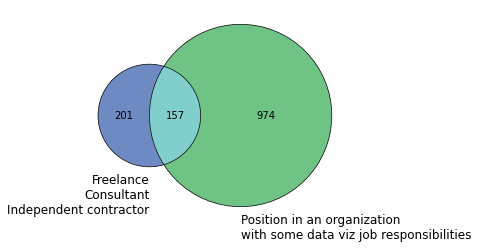

In [8]:
venn2([set(d1), set(d2)], 
      set_colors=('#3E64AF', '#3EAF5D'), 
      set_labels = ('Freelance\nConsultant\nIndependent contractor', 
                    'Position in an organization\nwith some data viz job responsibilities'),
      alpha=0.75)
venn2_circles([set(d1), set(d2)], lw=0.7)
plt.show()

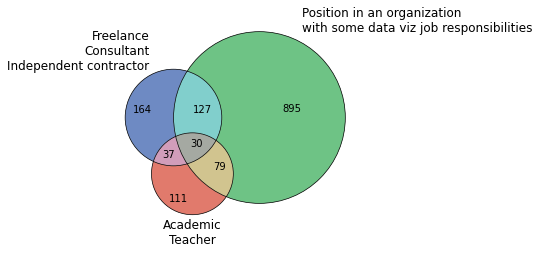

In [10]:
venn3([set(d1), set(d2), set(d5)],
      set_colors=('#3E64AF', '#3EAF5D', '#D74E3B'), 
      set_labels = ('Freelance\nConsultant\nIndependent contractor', 
                    'Position in an organization\nwith some data viz job responsibilities',
                    'Academic\nTeacher'),
      alpha=0.75)
venn3_circles([set(d1), set(d2), set(d5)], lw=0.7)
 
plt.show()

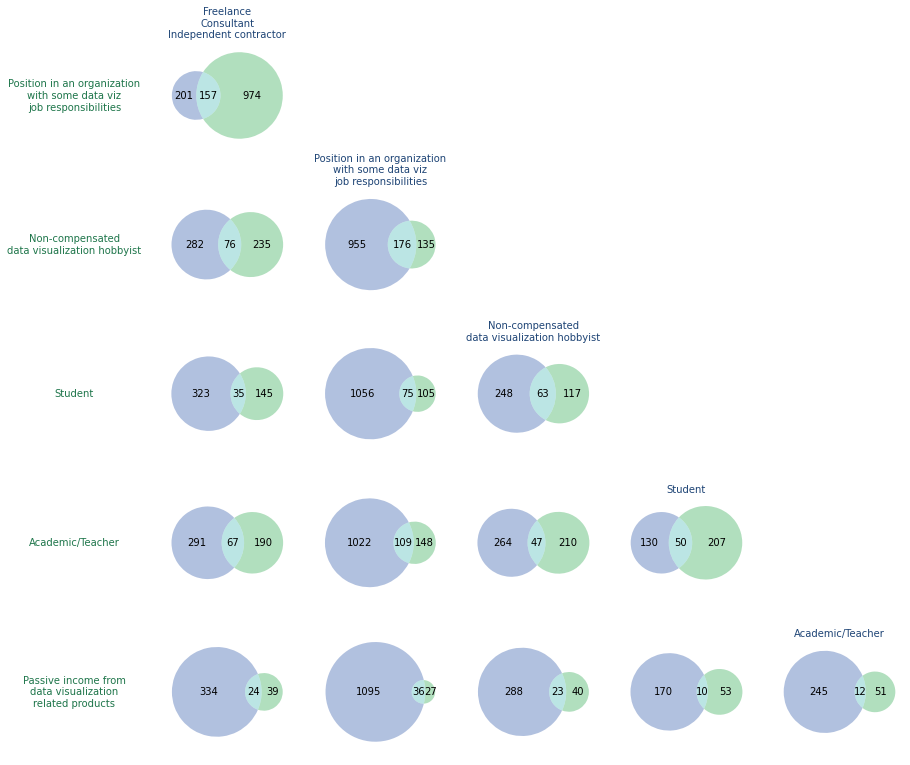

In [11]:
labels = ['Freelance\nConsultant\nIndependent contractor',
          'Position in an organization\nwith some data viz\njob responsibilities', 
          'Non-compensated\ndata visualization hobbyist',
          'Student',
          'Academic/Teacher',
          'Passive income from\ndata visualization\nrelated products']
c = ('#3E64AF', '#3EAF5D')
# subplot indexes
txt_indexes = [1, 7, 13, 19, 25]
title_indexes = [2, 9, 16, 23, 30]
plot_indexes = [8, 14, 20, 26, 15, 21, 27, 22, 28, 29]
# combinations of sets
title_sets = [[set(d1), set(d2)], [set(d2), set(d3)], 
              [set(d3), set(d4)], [set(d4), set(d5)], 
              [set(d5), set(d6)]]
plot_sets = [[set(d1), set(d3)], [set(d1), set(d4)], 
             [set(d1), set(d5)], [set(d1), set(d6)],
             [set(d2), set(d4)], [set(d2), set(d5)],
             [set(d2), set(d6)], [set(d3), set(d5)],
             [set(d3), set(d6)], [set(d4), set(d6)]]
fig, ax = plt.subplots(1, figsize=(16,16))
# plot texts
for idx, txt_idx in enumerate(txt_indexes):
    plt.subplot(6, 6, txt_idx)
    plt.text(0.5,0.5,
             labels[idx+1], 
             ha='center', va='center', color='#1F764B')
    plt.axis('off')
    
# plot top plots (the ones with a title)
for idx, title_idx in enumerate(title_indexes):
    plt.subplot(6, 6, title_idx)
    venn2(title_sets[idx], set_colors=c, set_labels = (' ', ' '))
    plt.title(labels[idx], fontsize=10, color='#1F4576')
    
# plot the rest of the diagrams
for idx, plot_idx in enumerate(plot_indexes):
    plt.subplot(6, 6, plot_idx)
    venn2(plot_sets[idx], set_colors=c, set_labels = (' ', ' '))
    
plt.savefig('venn_matrix.png')